In [2]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import numpy as np
from sklearn.feature_extraction.text import  TfidfTransformer
from IPython.display import Image

%pylab inline

bd=pd.read_csv('sentemental_dataset_kaggle.tsv',sep='\t')

Populating the interactive namespace from numpy and matplotlib


pip install BeautifulSoup <br>
pip install nltk

#Sentimenatal Analasys, bag of words

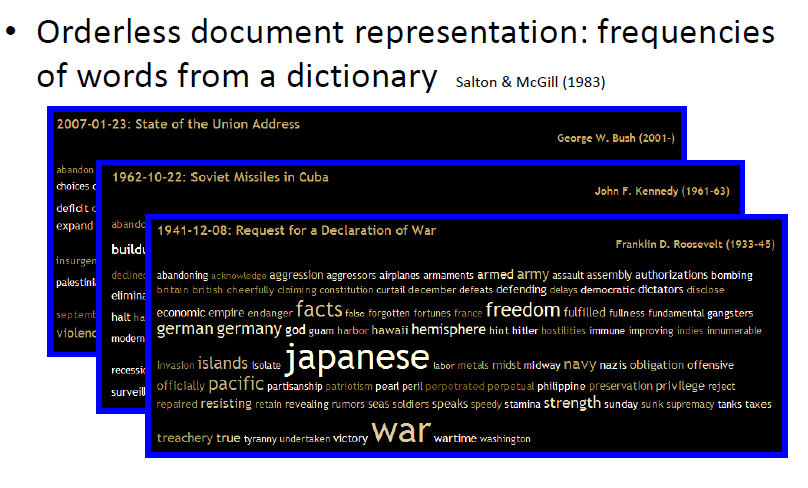

In [3]:
Image('1.png')

The term document matrix <br>
The weight of a term that occurs in a document is simply proportional to the term frequency.

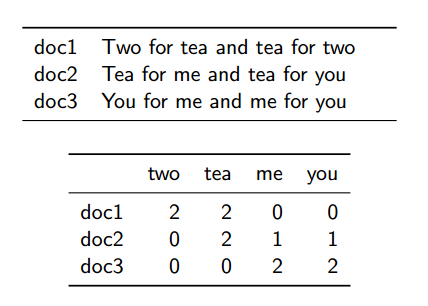

In [4]:
Image('2.png')

Long document


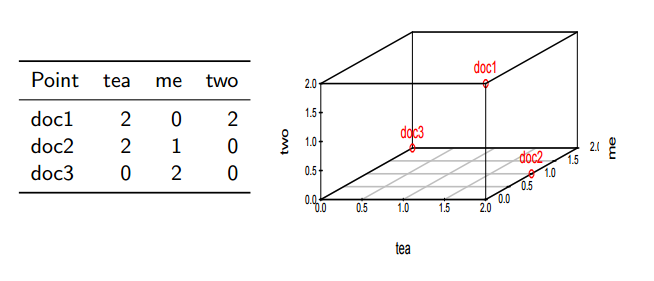

In [5]:
Image('3.png')

Angular Distance

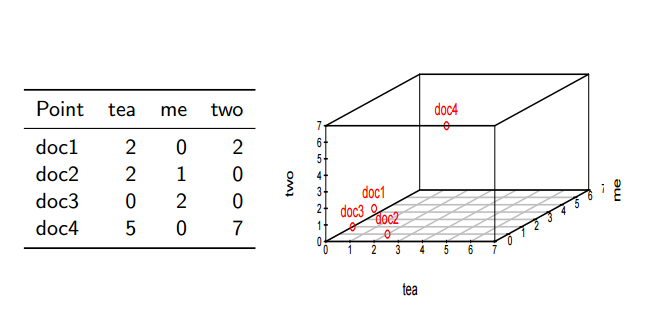

In [6]:
Image('4.png')

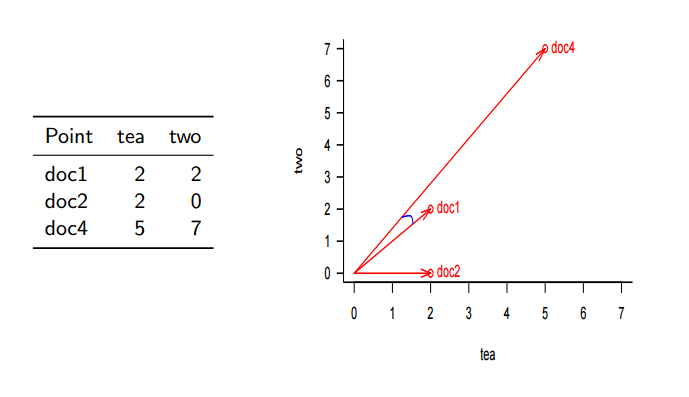

In [7]:
Image('5.png')

Inverse Document Frequency <br>
Inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

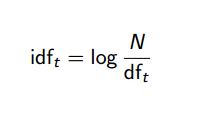

In [15]:
Image('6.png') 
#number of documents where the term  t  appears

TF*IDF

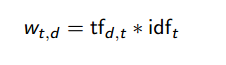

In [12]:
Image('7.png')

Sub linear TF-IDF weightening

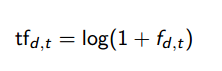

In [14]:
Image('8.png') # if therm appears 20 times more  it does not matter that the weight of doc 20 times more

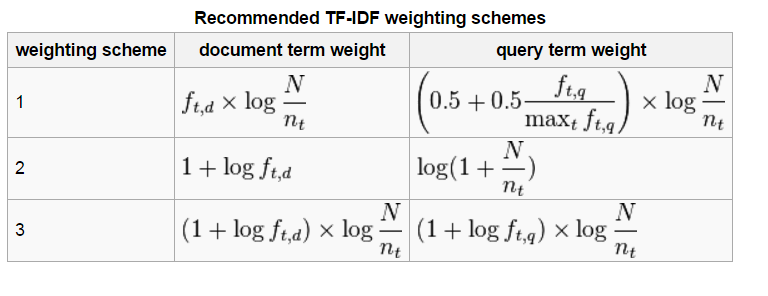

In [17]:
Image('11.png')

In [3]:
bd.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
print (bd.iloc[0,2])

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

Cleaning from html tags

In [6]:
soup = BeautifulSoup(bd.iloc[0,2])
text = soup.getText()
print(text)


With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

In [64]:
# s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
#s.split()

Lower register

In [7]:
text=text.lower()
text

u"with all this stuff going down at the moment with mj i've started listening to his music, watching the odd documentary here and there, watched the wiz and watched moonwalker again. maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. some of it has subtle messages about mj's feeling towards the press and also the obvious message of drugs are bad m'kay.visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring. some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him.the actual feature film bit when it finally starts is only on for 20 m

Remouving stop punctuations

In [8]:
toker = RegexpTokenizer(r'((?<=[^\w\s])\w(?=[^\w\s])|(\W))+', gaps=True)
tokens=toker.tokenize(text)
' '.join(tokens)

u'with all this stuff going down at the moment with mj i ve started listening to his music watching the odd documentary here and there watched the wiz and watched moonwalker again maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for 20 minutes 

Remouving stop words

In [55]:
filtered_words = filter(lambda token: token not in stopwords.words('english'), tokens)

In [54]:
filtered_words
' '.join(filtered_words)

u'stuff going moment mj ve started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad m kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts 20 minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors ha

Stemming

In [52]:
porter_stemmer = PorterStemmer()
porter_stemmer.stem(filtered_words[1])
tokens_stem=map(lambda x: porter_stemmer.stem(x), filtered_words)


if the word ends in 'ed', remove the 'ed' <br>
if the word ends in 'ing', remove the 'ing'<br>
if the word ends in 'ly', remove the 'ly'

In [53]:
text_stem=' '.join(tokens_stem)
text_stem


u'stuff go moment mj ve start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad m kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start 20 minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think pe

In [64]:

from nltk.util import ngrams
list(ngrams(tokens_stem,3))[:10]

[(u'stuff', u'go', u'moment'),
 (u'go', u'moment', u'mj'),
 (u'moment', u'mj', u've'),
 (u'mj', u've', u'start'),
 (u've', u'start', u'listen'),
 (u'start', u'listen', u'music'),
 (u'listen', u'music', u'watch'),
 (u'music', u'watch', u'odd'),
 (u'watch', u'odd', u'documentari'),
 (u'odd', u'documentari', u'watch')]

joe pesci; michael jackson; featur film
Displaying 11 of 11 matches:
                                      mj ve start listen music watch odd docum
see cinema origin releas subtl messag mj feel toward press also obviou messag 
urs michael jackson unless remot like mj anyway go hate find bore may call mj 
 mj anyway go hate find bore may call mj egotist consent make movi mj fan woul
may call mj egotist consent make movi mj fan would say made fan true realli ni
nvinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah
wer drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact 
 know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car
ayb hate mj music lot cool thing like mj turn car robot whole speed demon sequ
anc scene bottom line movi peopl like mj one level anoth think peopl stay away
ay away tri give wholesom messag iron mj bestest buddi movi girl michael jacks


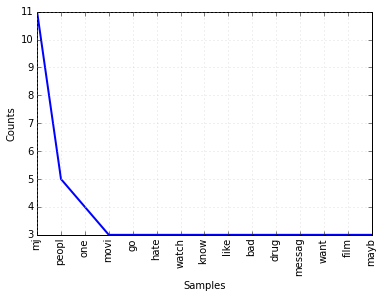

In [68]:
text = nltk.Text(tokens_stem)

text.collocations()
text.concordance('mj')
fdist=FreqDist(text)
fdist.plot(15)

vectorizer = CountVectorizer(analyzer = "word",       max_features = 5000)  

In [43]:
cv = CountVectorizer(vocabulary=['hot', 'cold', 'old'])
cv.fit_transform(['pease porridge hot hot', 'pease porridge cold', 'pease porridge in the pot',
                  'nine days old']).toarray()

array([[2, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1]], dtype=int64)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

allvoc=''
#set(bd_xy.iloc[:,1].values)
for i in tokens_stem:
    allvoc=allvoc+i+' '
vocab = [allvoc]
vec = CountVectorizer().fit(vocab)

#print len(vec.get_feature_names())

ar=[]

for vi in tokens_stem:
    sentence = vec.transform([vi])
    r=sentence.toarray() 
    rr=r[0]
    ar.append(rr)
    
arrr=np.array(ar)    

In [23]:
len(vec.get_feature_names())

158

In [24]:
arrr[3,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
X=np.array([[1,2,3,4],[0,1,2,3],[0,2,0,0]])
print X

[[1 2 3 4]
 [0 1 2 3]
 [0 2 0 0]]


Transform a count matrix to a normalized tf or tf-idf representation
Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.
The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.
The actual formula used for tf-idf is tf * (idf + 1) = tf + tf * idf, instead of tf * idf. The effect of this is that terms with zero idf, i.e. that occur in all documents of a training set, will not be entirely ignored. The formulas used to compute tf and idf depend on parameter settings that correspond to the SMART notation used in IR, as follows:

In [20]:
vectorizer = TfidfTransformer()
X_out = vectorizer.fit_transform(X)
X_out.toarray()


array([[ 0.24357449,  0.28771804,  0.55573404,  0.74097872],
       [ 0.        ,  0.21055839,  0.54226453,  0.81339679],
       [ 0.        ,  1.        ,  0.        ,  0.        ]])